# analisando arquivo com python 

In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('Relatorio_Atendimento_dos_Profissionais_janeiro.csv', encoding='latin1', sep=';', skiprows=4)
print(df.head())


  Total Geral de Atendimentos Total Geral de FA     Tempo Total Geral  \
0                       54351             51758  1421d, 07h:43min:01s   
1                         NaN               NaN                   NaN   
2                Profissional               CBO     Total Atendimento   
3                         NaN               NaN                   NaN   
4      ABIGAIL FERREIRA PIRES        ENFERMEIRO                   162   

  Unnamed: 3          Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
0        NaN                 NaN        NaN        NaN        NaN        NaN  
1        NaN                 NaN        NaN        NaN        NaN        NaN  
2   Total FA  Temp. Total Atend.        NaN        NaN        NaN        NaN  
3        NaN                 NaN        NaN        NaN        NaN        NaN  
4        162       09h:43min:32s        NaN        NaN        NaN        NaN  


In [18]:
# Remover colunas "Unnamed"
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Ou: renomear colunas manualmente, se souber quais são
# df.columns = ['Atendimentos', 'FA', 'Tempo']

In [19]:
print(df.head(20))

   Total Geral de Atendimentos Total Geral de FA     Tempo Total Geral
0                        54351             51758  1421d, 07h:43min:01s
1                          NaN               NaN                   NaN
2                 Profissional               CBO     Total Atendimento
3                          NaN               NaN                   NaN
4       ABIGAIL FERREIRA PIRES        ENFERMEIRO                   162
5                           FA          Consulta  Local de Atendimento
6                      1941180           2975635                   NaN
7                      1941182           2975643                   NaN
8                      1941185           2975663                   NaN
9                      1941186           2975680                   NaN
10                     1941190           2975730                   NaN
11                     1941192           2975753                   NaN
12                     1941194           2975771                   NaN
13    

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55086 entries, 0 to 55085
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Total Geral de Atendimentos  54841 non-null  object
 1   Total Geral de FA            54841 non-null  object
 2   Tempo Total Geral            37823 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB
None


In [26]:
# Lista de especialidades médicas que queremos filtrar
especialidades = [
    "Clínica Médica", "Ortopedia", "Cirurgia Geral", "Pediatria",
    "Ginecologia", "Psiquiatria", "Neurologia", "Cardiologia",
    "Dermatologia", "Otorrinolaringologia", "Urologia", "Endocrinologia"
    # Adicione outras se necessário
]

# Cria a máscara para verificar se qualquer coluna contém alguma das especialidades
mascara_especialidades = df.apply(
    lambda col: col.astype(str).str.contains('|'.join(especialidades), case=False, na=False)
)

# Filtra apenas as linhas que têm alguma especialidade
df_medicos = df[mascara_especialidades.any(axis=1)]

# Visualiza as primeiras 20 linhas filtradas
print(df_medicos.head(10))



     Total Geral de Atendimentos Total Geral de FA           Tempo Total Geral
1105                     1941699           2978051  CONSULTÓRIO - PEDIATRIA 02
1106                     1941730           2978171  CONSULTÓRIO - PEDIATRIA 02
1107                     1941744           2978229  CONSULTÓRIO - PEDIATRIA 02
1108                     1941856           2978623  CONSULTÓRIO - PEDIATRIA 02
1109                     1941868           2978657  CONSULTÓRIO - PEDIATRIA 02
1110                     1941872           2978679  CONSULTÓRIO - PEDIATRIA 02
1111                     1941876           2978709  CONSULTÓRIO - PEDIATRIA 02
1112                     1941898           2978773  CONSULTÓRIO - PEDIATRIA 02
1113                     1941898           2978817  CONSULTÓRIO - PEDIATRIA 02
1114                     1941900           2978849  CONSULTÓRIO - PEDIATRIA 02


In [29]:
df.columns

Index(['Total Geral de Atendimentos', 'Total Geral de FA',
       'Tempo Total Geral'],
      dtype='object')

In [32]:
df_resumo = df_medicos.groupby('Total Geral de Atendimentos')['Tempo Total Geral'].sum().reset_index()


In [33]:
df_resumo

,Total Geral de Atendimentos,Tempo Total Geral
0,1941093,CONSULTÓRIO - PSIQUIATRIA
1,1941123,CONSULTÓRIO - PSIQUIATRIACONSULTÓRIO - PSIQUIA...
2,1941154,CONSULTÓRIO - PSIQUIATRIA
3,1941187,CONSULTÓRIO - ORTOPEDIACONSULTÓRIO - ORTOPEDIA
4,1941198,CONSULTÓRIO - PEDIATRIA 01
...,...,...
3776,1956700,CONSULTÓRIO - PEDIATRIA 01CONSULTÓRIO - PEDIAT...
3777,1956703,CONSULTÓRIO - ORTOPEDIA
3778,1956704,CONSULTÓRIO - PEDIATRIA 01
3779,1956714,CONSULTÓRIO - PEDIATRIA 02


C:\Users\marce\AppData\Local\Temp\ipykernel_15288\1283093646.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


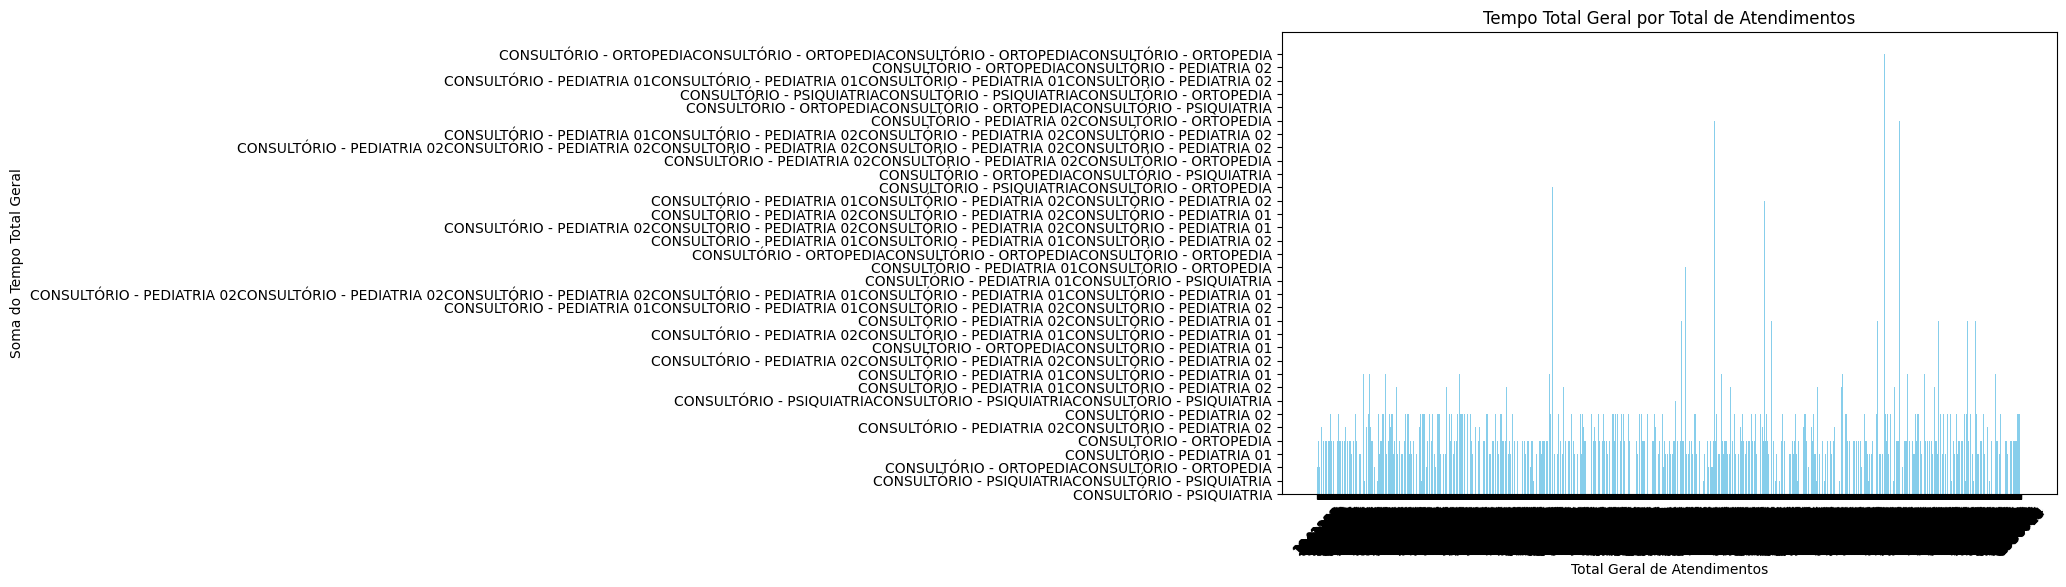

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_resumo['Total Geral de Atendimentos'], df_resumo['Tempo Total Geral'], color='skyblue')
plt.xlabel('Total Geral de Atendimentos')
plt.ylabel('Soma do Tempo Total Geral')
plt.title('Tempo Total Geral por Total de Atendimentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
print(df_resumo)


     Total Geral de Atendimentos  \
0                        1941093   
1                        1941123   
2                        1941154   
3                        1941187   
4                        1941198   
...                          ...   
3776                     1956700   
3777                     1956703   
3778                     1956704   
3779                     1956714   
3780                     1956719   

                                      Tempo Total Geral  
0                             CONSULTÓRIO - PSIQUIATRIA  
1     CONSULTÓRIO - PSIQUIATRIACONSULTÓRIO - PSIQUIA...  
2                             CONSULTÓRIO - PSIQUIATRIA  
3        CONSULTÓRIO - ORTOPEDIACONSULTÓRIO - ORTOPEDIA  
4                            CONSULTÓRIO - PEDIATRIA 01  
...                                                 ...  
3776  CONSULTÓRIO - PEDIATRIA 01CONSULTÓRIO - PEDIAT...  
3777                            CONSULTÓRIO - ORTOPEDIA  
3778                         CONSULTÓRIO - PE

In [38]:
# Salvar o DataFrame em um arquivo CSV na pasta atual, nome do arquivo: resumo_atendimentos.csv
df_resumo.to_csv('resumo_atendimentos_janeiro.csv', index=False)


C:\Users\marce\AppData\Local\Temp\ipykernel_15288\1121923930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicos['Especialidades'] = df_medicos['Tempo Total Geral'].str.findall(r'CONSULTÓRIO - ([A-ZÁÉÍÓÚÇ ]+)')


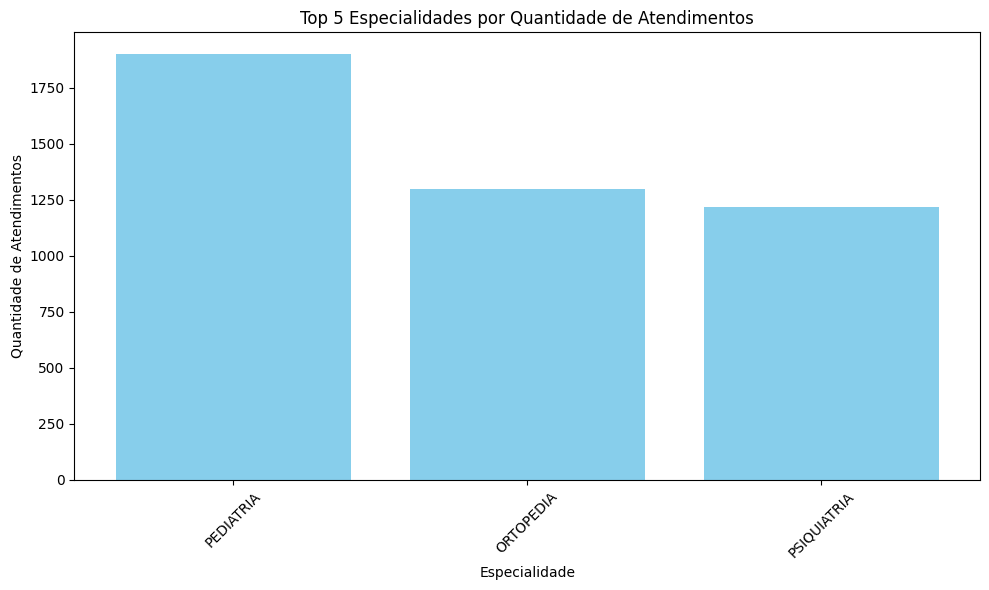

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Extrair todas as especialidades que aparecem, mesmo se estiverem concatenadas
df_medicos['Especialidades'] = df_medicos['Tempo Total Geral'].str.findall(r'CONSULTÓRIO - ([A-ZÁÉÍÓÚÇ ]+)')

# Explodir as listas em várias linhas
df_exp = df_medicos.explode('Especialidades')

# Limpar espaços em branco extras, caso existam
df_exp['Especialidades'] = df_exp['Especialidades'].str.strip()

# Contar atendimentos por especialidade
contagem = df_exp.groupby('Especialidades').size().reset_index(name='Qtd_Atendimentos')

# Selecionar as top 5 especialidades
top5 = contagem.sort_values(by='Qtd_Atendimentos', ascending=False).head(5)

# Plotar gráfico
plt.figure(figsize=(10,6))
plt.bar(top5['Especialidades'], top5['Qtd_Atendimentos'], color='skyblue')
plt.title('Top 5 Especialidades por Quantidade de Atendimentos')
plt.xlabel('Especialidade')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
